**Pre processing of data**

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)

In [3]:
train_labels = []
train_samples = []

In [28]:

# generate data =>> numerical dataset
def create_dataset(x_array,y_array):
    for i in range(50):
        # the 5% of younger patients with side effects
        random_younger = np.random.randint(13,64)
        x_array.append(random_younger)
        y_array.append(1)

        # 5% of older patients with no side effects
        random_older = np.random.randint(65,100)
        x_array.append(random_older)
        y_array.append(0)

    for i in range(1000):
        # 95% of younger patients with no side effects
        random_younger = np.random.randint(13,64)
        x_array.append(random_younger)
        y_array.append(0)

        # 95% of older patients with  side effects
        random_older = np.random.randint(65,100)
        x_array.append(random_older)
        y_array.append(1)

create_dataset(train_samples,train_labels)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [5]:
print(train_labels[:10])
print(train_samples[:10])

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[57, 65, 16, 68, 52, 74, 32, 86, 63, 88]


In [6]:
# process data
# convert to numpy array

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
print(scaler_train_samples[:5])

[[0.48837209]
 [0.96511628]
 [0.88372093]
 [0.1627907 ]
 [0.8255814 ]]


Model creation 

In [15]:
import tensorflow as tf
import keras
from tensorflow import keras
from keras import Sequential
from keras.layers import Activation,Dense,Input
from keras.optimizers import Adam
from keras.metrics import CategoricalCrossentropy




In [19]:
model = Sequential([
   
    Input(shape=(1,)),  # Specify the input shape explicitly
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax') 

])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=scaler_train_samples,y=train_labels,batch_size=10,epochs=30,validation_split=0.1,shuffle=True,verbose=2)

In [35]:
test_labels = []
test_samples = []

create_dataset(test_samples,test_labels)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels,test_samples = shuffle(train_labels,train_samples)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))
print(test_samples[:5])
print(test_labels[:5])


[96 39 72 46 24]
[1 0 1 0 0]


In [49]:
predictions = model.predict(scaled_test_samples,batch_size=10,verbose=0)


In [55]:
predictions
np.argmax([0.02442205, 0.975578  ])

1

In [46]:
def display_predictions(samples, predictions, labels):
    print(f"{'Age':<10}{'Predicted':<15}{'Confidence':<15}{'Actual':<10}")
    print("=" * 50)

    for i, (sample, prediction, actual) in enumerate(zip(samples, predictions, labels)):
        predicted_class = np.argmax(prediction)  # Class with highest probability
        confidence = prediction[predicted_class] * 100  # Confidence percentage
        actual_class = actual
        
        print(f"{sample:<10}{'Side Effect' if predicted_class == 1 else 'No Side Effect':<20}"
              f"{confidence:<15.2f}{actual_class:<10}")
        
display_predictions(test_samples[:15], predictions[:15], test_labels[:15])


Age       Predicted      Confidence     Actual    
96        Side Effect         97.56          1         
39        No Side Effect      97.11          0         
72        Side Effect         84.67          1         
46        No Side Effect      95.46          0         
24        No Side Effect      96.94          0         
73        Side Effect         86.91          1         
98        Side Effect         97.78          1         
13        No Side Effect      96.81          0         
55        No Side Effect      80.49          0         
30        No Side Effect      97.01          0         
84        Side Effect         95.64          1         
49        No Side Effect      92.56          0         
21        No Side Effect      96.90          0         
60        No Side Effect      62.20          0         
73        Side Effect         86.91          1         


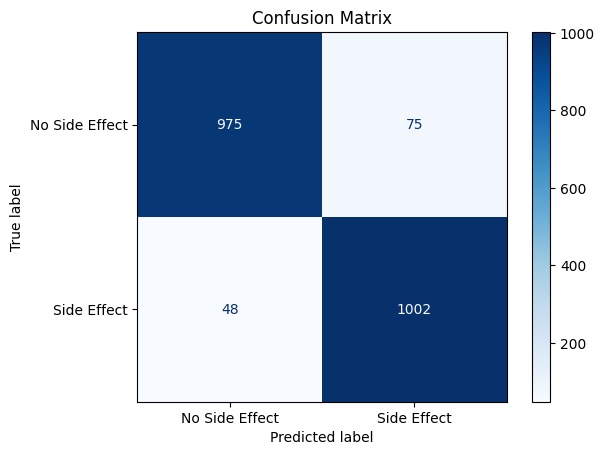

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

threshold = 0.5

def plot_confusion_matrix(true_labels, predicted_probs, class_names):
    # Convert predicted probabilities to class predictions
    predicted_classes = np.argmax(predicted_probs, axis=1)

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_classes)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title("Confusion Matrix")
    plt.show()
    
# Use the function to plot confusion matrix
plot_confusion_matrix(test_labels, predictions, class_names=["No Side Effect", "Side Effect"])


In [56]:
from datetime import datetime
import os
date = datetime.now().strftime("%Y%m%d")
name = f'{"side_effect_classifier"}_{"v1"}_{date}.h5'
if(os.path.isfile(name)) is False:
    model.save(name)

In [ ]:
model = keras.models.load_model(name)
predictions = model.predict(scaled_test_samples,batch_size=10,verbose=0)

NameError: name 'keras' is not defined